In [1]:
import pandas as pd 
from matplotlib import pyplot as plt

df = pd.read_csv('power_consumption.csv')
print(df.dtypes)
df.head()

year                                            int64
electric lights(kWh)                           object
electricity sales(kWh)                         object
total amount(kWh)                              object
electric lights(households)                    object
electricity sales(households)                  object
total households                               object
electric lights households(non-commercial)     object
electric lights households(commercial)         object
average price of electric lights              float64
average price of electricity sales            float64
average price of total amount                 float64
dtype: object


,year,electric lights(kWh),electricity sales(kWh),total amount(kWh),electric lights(households),electricity sales(households),total households,electric lights households(non-commercial),electric lights households(commercial),average price of electric lights,average price of electricity sales,average price of total amount
0,1951,"250,405,594","704,910,723","955,316,317","485,410","15,051","500,461","415,542","69,868",0.3594,0.0871,0.1584
1,1952,"259,468,670","816,554,150","1,076,022,820","512,442","16,304","528,746","433,132","79,310",0.3687,0.0873,0.1551
2,1953,"300,848,597","923,978,277","1,224,826,874","530,157","17,649","547,806","446,729","83,428",0.4304,0.1128,0.1908
3,1954,"324,241,555","1,078,306,769","1,402,548,324","580,170","21,644","601,814","488,579","91,591",0.4382,0.1156,0.1902
4,1955,"340,488,568","1,156,177,647","1,496,666,215","625,839","24,722","650,561","528,011","97,828",0.5853,0.1556,0.2533


In [2]:
df['electric lights(kWh)'] = df['electric lights(kWh)'].str.replace(',','').apply(pd.to_numeric)
df['electricity sales(kWh)'] = df['electricity sales(kWh)'].str.replace(',','').apply(pd.to_numeric)
df['total amount(kWh)'] = df['total amount(kWh)'].str.replace(',','').apply(pd.to_numeric)
df['electric lights(households)'] = df['electric lights(households)'].str.replace(',','').apply(pd.to_numeric)
df['electricity sales(households)'] = df['electricity sales(households)'].str.replace(',','').apply(pd.to_numeric)
df['total households'] = df['total households'].str.replace(',','').apply(pd.to_numeric)
df['electric lights households(non-commercial)'] = df['electric lights households(non-commercial)'].str.replace(',','').apply(pd.to_numeric)
df['electric lights households(commercial)'] = df['electric lights households(commercial)'].str.replace(',','').apply(pd.to_numeric)

df.columns

Index(['year', 'electric lights(kWh)', 'electricity sales(kWh)',
       'total amount(kWh)', 'electric lights(households)',
       'electricity sales(households)', 'total households',
       'electric lights households(non-commercial)',
       'electric lights households(commercial)',
       'average price of electric lights',
       'average price of electricity sales', 'average price of total amount'],
      dtype='object')

In [3]:
df.head()

,year,electric lights(kWh),electricity sales(kWh),total amount(kWh),electric lights(households),electricity sales(households),total households,electric lights households(non-commercial),electric lights households(commercial),average price of electric lights,average price of electricity sales,average price of total amount
0,1951,250405594,704910723,955316317,485410,15051,500461,415542,69868,0.3594,0.0871,0.1584
1,1952,259468670,816554150,1076022820,512442,16304,528746,433132,79310,0.3687,0.0873,0.1551
2,1953,300848597,923978277,1224826874,530157,17649,547806,446729,83428,0.4304,0.1128,0.1908
3,1954,324241555,1078306769,1402548324,580170,21644,601814,488579,91591,0.4382,0.1156,0.1902
4,1955,340488568,1156177647,1496666215,625839,24722,650561,528011,97828,0.5853,0.1556,0.2533


,electric lights(GWh),electricity sales(GWh),total amount(GWh)
count,20.000000,20.000000,20.000000
mean,60007.087640,136025.322685,196032.410326
std,4377.090484,18284.306014,22545.214999
min,50757.785618,100434.904363,151192.689981
25%,57969.367394,123035.278601,181004.645995
50%,59335.985981,138647.558622,198513.998923
75%,63500.891157,149801.531732,213701.823903
max,68962.969828,166377.941713,235340.911541


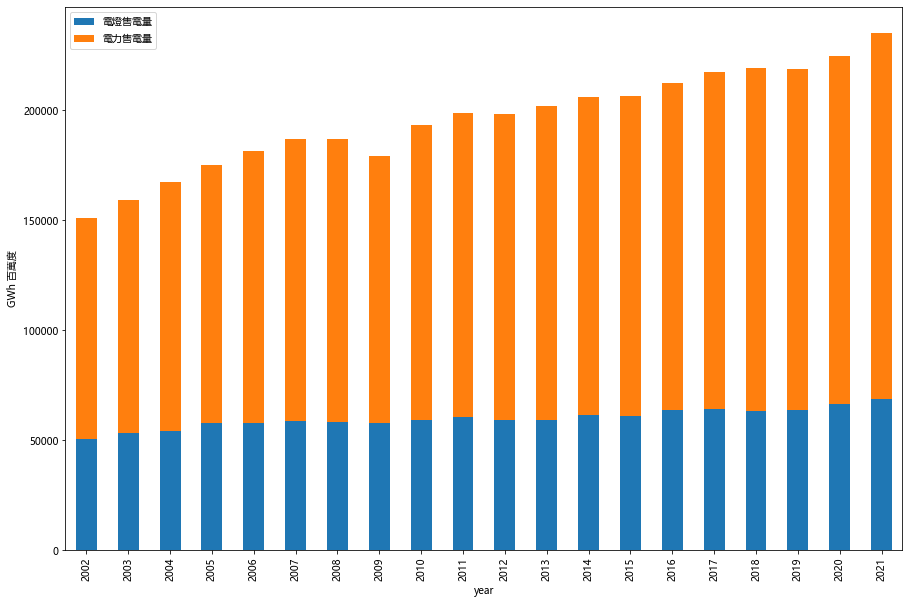

In [11]:
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
df['electric lights(GWh)'] = df.apply(lambda row: row['electric lights(kWh)'] / 1000000, axis=1)
df['electricity sales(GWh)'] = df.apply(lambda row: row['electricity sales(kWh)'] / 1000000, axis=1)
df['total amount(GWh)'] = df.apply(lambda row: row['total amount(kWh)'] / 1000000, axis=1)

n_df = df[['year', 'electric lights(GWh)', 'electricity sales(GWh)']].copy()

n_df.rename(columns ={ 
    'electric lights(GWh)': '電燈售電量',
    'electricity sales(GWh)': '電力售電量'
}, inplace = True)
ax = n_df.tail(20).plot(x='year',  figsize=(15,10), kind='bar', stacked=True)
ax.set_ylabel(u"GWh 百萬度")


df[['electric lights(GWh)', 'electricity sales(GWh)', 'total amount(GWh)' ]].tail(20).describe()

In [5]:
households_df = df[[
    'year',
    'electric lights(households)',
    'electricity sales(households)', 
    'total households',
    'electric lights households(non-commercial)',
    'electric lights households(commercial)'
]].copy()

households_df.head()

,year,electric lights(households),electricity sales(households),total households,electric lights households(non-commercial),electric lights households(commercial)
0,1951,485410,15051,500461,415542,69868
1,1952,512442,16304,528746,433132,79310
2,1953,530157,17649,547806,446729,83428
3,1954,580170,21644,601814,488579,91591
4,1955,625839,24722,650561,528011,97828


,electric lights household rate,electricity sales household rate
count,20.000000,20.000000
mean,0.975915,0.024085
std,0.001369,0.001369
min,0.973983,0.022173
25%,0.974536,0.022886
50%,0.976057,0.023943
75%,0.977114,0.025464
max,0.977827,0.026017


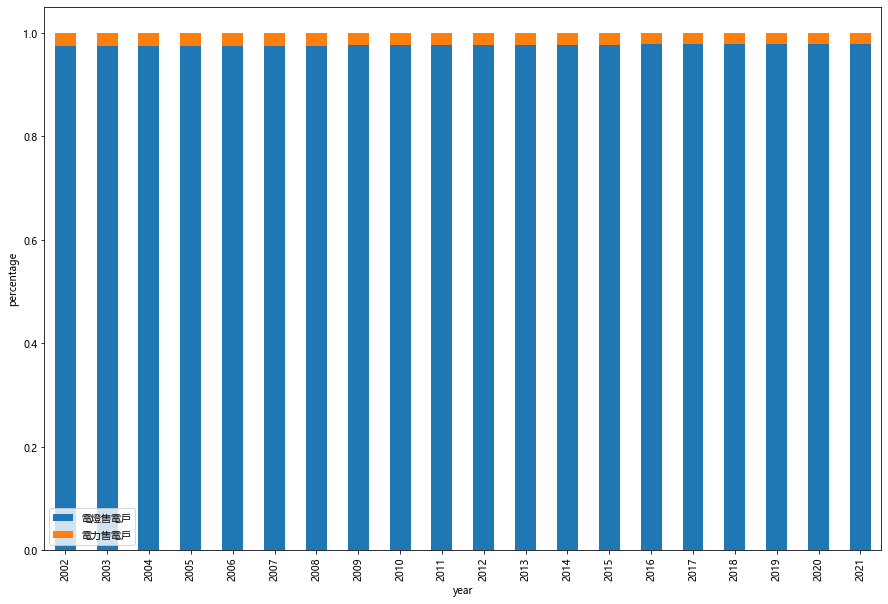

In [15]:
households_df['electric lights household rate'] = households_df.apply(lambda row: row['electric lights(households)'] / row['total households'], axis = 1)
households_df['electricity sales household rate'] = households_df.apply(lambda row: row['electricity sales(households)'] / row['total households'], axis = 1)

n_households_df = households_df[['year', 'electric lights household rate', 'electricity sales household rate']].copy()
n_households_df.rename(columns = {
    'electric lights household rate': '電燈售電戶數比',
    'electricity sales household rate': '電力售電戶數比'
}, inplace=True)


ax= n_households_df.tail(n=20).plot(x='year', figsize=(15,10), kind='bar', stacked=True)
ax.set_ylabel('percentage')

households_df['electric lights households rate(non-commercial)'] = households_df.apply(lambda row: row['electric lights households(non-commercial)'] / row['electric lights(households)'], axis = 1)
households_df['electric lights households rate(commercial)'] = households_df.apply(lambda row: row['electric lights households(commercial)'] / row['electric lights(households)'], axis = 1)
households_df[['electric lights household rate', 'electricity sales household rate']].tail(n=20).describe()


,electric lights households rate(non-commercial),electric lights households rate(commercial)
count,20.000000,20.000000
mean,0.923224,0.076776
std,0.005413,0.005413
min,0.912077,0.071720
25%,0.919960,0.072610
50%,0.925823,0.074177
75%,0.927390,0.080040
max,0.928280,0.087923


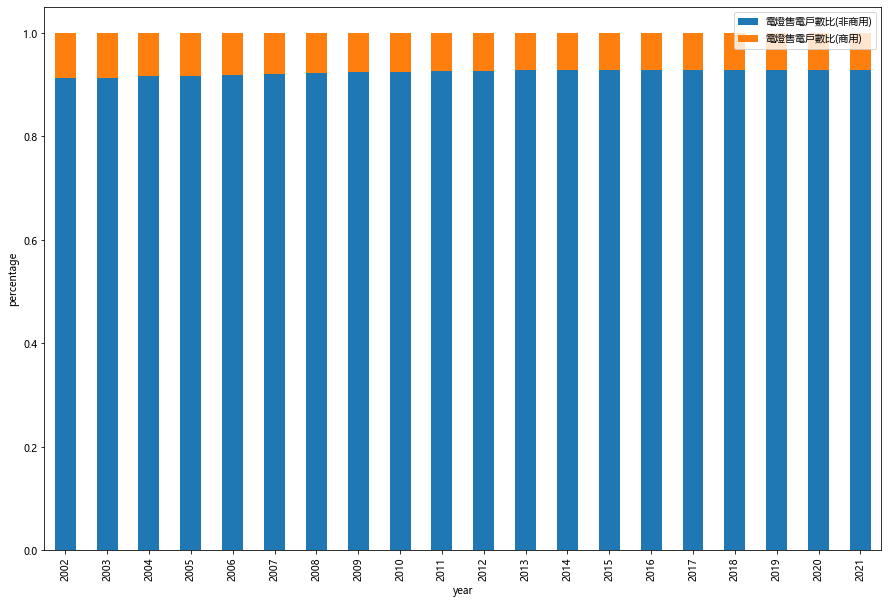

In [7]:
n_households_df = households_df[[
    'year', 
    'electric lights households rate(non-commercial)', 
    'electric lights households rate(commercial)'
]].copy()

n_households_df.rename(columns = {
    'electric lights households rate(non-commercial)': '電燈售電戶數比(非商用)',
    'electric lights households rate(commercial)': '電燈售電戶數比(商用)'
}, inplace=True)


ax = n_households_df.tail(n=20).plot(x='year', figsize=(15,10), kind='bar', stacked=True)
ax.set_ylabel('percentage')

households_df[['electric lights households rate(non-commercial)', 'electric lights households rate(commercial)']].tail(n=20).describe()


,year,總戶數
count,20.00000,20.000000
mean,2011.50000,12.868032
std,5.91608,1.212474
min,2002.00000,10.897402
25%,2006.75000,11.923762
50%,2011.50000,12.872332
75%,2016.25000,13.870821
max,2021.00000,14.750538


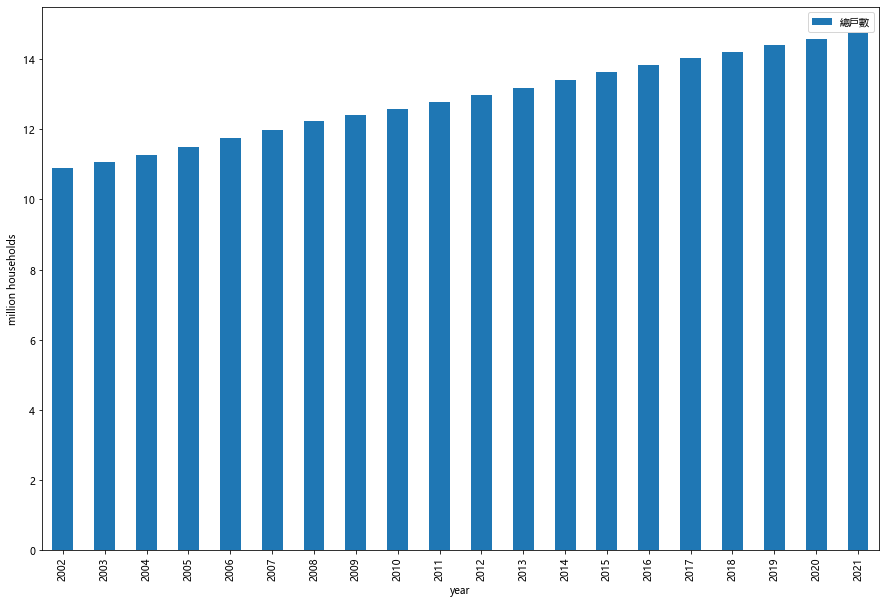

In [25]:
new_df = households_df[['year', 'total households']].copy()
new_df['total households'] = new_df.apply(lambda row: row['total households'] / 1000000, axis=1)

new_df.rename(columns = {
    'total households': '總戶數',
}, inplace=True)

ax = new_df.tail(n=20).plot(x='year', figsize=(15,10), kind='bar')
ax.set_ylabel("million households")
new_df.tail(n=20).describe()

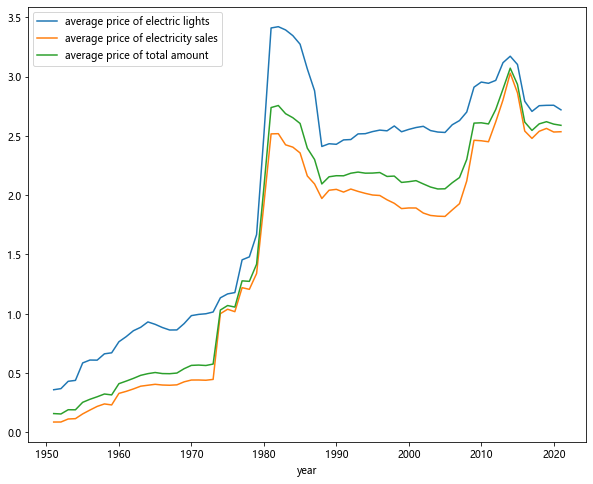

In [9]:
average_price_df = df[[
    'year',
    'average price of electric lights',
    'average price of electricity sales', 
    'average price of total amount'
]]

average_price_df.plot(x='year', figsize=(10,8))